In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
import os


In [2]:
df = pd.read_csv("credit_risk_file_1.csv")

In [3]:
df

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.00,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0,2,0,0,0,0,3,1,24,5
51332,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0,2,0,0,0,2,2,0,74,7
51333,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,0,2,0,0,0,0,2,0,9,5
51334,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0,2,0,0,0,0,2,0,15,8


In [4]:
# Default Risk to 0 (low risk)
df['Risk'] = 0

# Define rules for High Risk
df.loc[df['Tot_Missed_Pmnt'] > 2, 'Risk'] = 1
df.loc[df['pct_tl_open_L6M'] > 0.5, 'Risk'] = 1

# Preview Risk logic
df[['Tot_Missed_Pmnt', 'pct_tl_open_L6M', 'Risk']].head()


,Tot_Missed_Pmnt,pct_tl_open_L6M,Risk
0,0,0.000,0
1,0,0.000,0
2,1,0.125,0
3,1,1.000,1
4,0,0.000,0


In [5]:
# Select features for training
SELECTED_FEATURES = [
    'Unsecured_TL', 'pct_active_tl', 'pct_closed_tl',
    'Tot_Closed_TL', 'Consumer_TL', 'Tot_Active_TL',
    'Secured_TL', 'Total_TL', 'Age_Oldest_TL', 'pct_tl_closed_L12M'
]

X = df[SELECTED_FEATURES]
y = df['Risk']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.9155


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))


Logistic Regression Accuracy: 0.8555707051032333


In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.9175107128944293


In [11]:
# Create model folder if it doesn't exist
os.makedirs('../model', exist_ok=True)

# Save model and feature list
joblib.dump((clf, SELECTED_FEATURES), '../model/credit_risk_model.pkl')
print("Model trained and saved.")


Model trained and saved.


In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



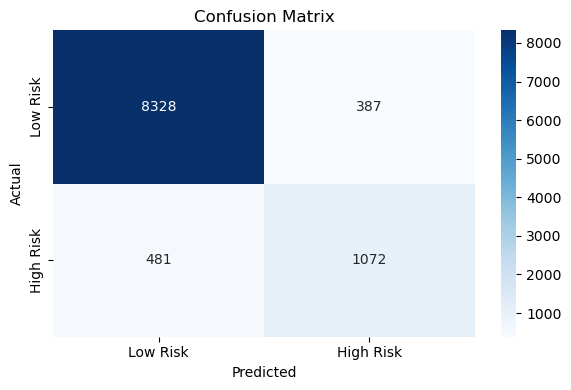

In [13]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Risk', 'High Risk'],
            yticklabels=['Low Risk', 'High Risk'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [14]:
# Get feature importances from the trained model
importances = clf.feature_importances_

# Create a DataFrame with feature names and their importances
feature_df = pd.DataFrame({
    'Feature': SELECTED_FEATURES,
    'Importance': importances
})

# Sort features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Show top features
feature_df.head(10)


,Feature,Importance
8,Age_Oldest_TL,0.596616
5,Tot_Active_TL,0.062852
4,Consumer_TL,0.050702
2,pct_closed_tl,0.049891
6,Secured_TL,0.047749
1,pct_active_tl,0.047122
7,Total_TL,0.046760
0,Unsecured_TL,0.040473
9,pct_tl_closed_L12M,0.037373
3,Tot_Closed_TL,0.020461


C:\Users\Abhinay\AppData\Local\Temp\ipykernel_30400\2027348513.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df.head(10), palette='Blues_d')


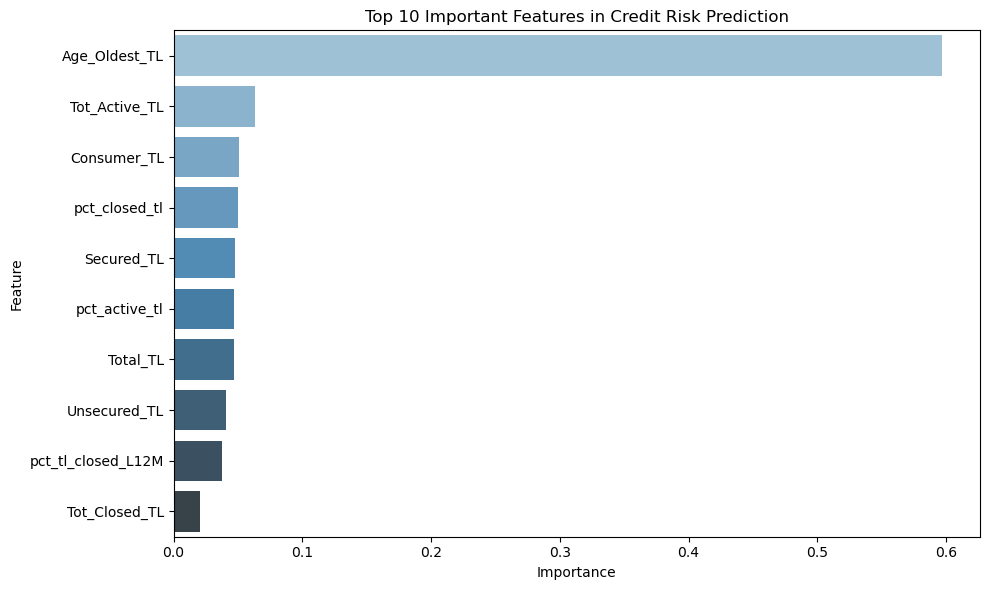

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(10), palette='Blues_d')
plt.title('Top 10 Important Features in Credit Risk Prediction')
plt.tight_layout()
plt.show()


In [16]:
from sklearn.metrics import classification_report, accuracy_score

# y_test: actual labels
# y_pred: predicted labels from your model

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.9154655239579276
Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      8715
           1       0.73      0.69      0.71      1553

    accuracy                           0.92     10268
   macro avg       0.84      0.82      0.83     10268
weighted avg       0.91      0.92      0.91     10268

